<a href="https://colab.research.google.com/github/giannismantzaris-cmd/DAMA61/blob/main/DAMA61_WA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Install seaborn package
!pip install seaborn

In [5]:
#install libraries
import seaborn as sns
import pandas as pd

In [6]:
#load my dataset
mpg = sns.load_dataset("mpg")

In [7]:
#inspect a few initial values
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [9]:
# Pinpointing the predictors and target variables. The target variable is the output we want to predict, thus mpg. All the rest are the predictors.
target = "mpg"
predictors = [col for col in mpg.columns if col != target]
print("Target variable:", target)
print("Predictor variables:", predictors)

Target variable: mpg
Predictor variables: ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'name']


In [ ]:
# Features likely influencing fuel efficiency:
# cylinders, displacement, horsepower, and weight are expected to infuence mpg
# model_year likely has a positive effect as newer cars tend to be more efficient
# acceleration may have a small positive or neutral effect.


In [10]:
# Dataset info
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [11]:
# Check number of missing values per column
mpg.isna().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model_year,0
origin,0
name,0


In [12]:
# Compute descriptive statistics
mpg.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model_year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


In [ ]:
# Discuss on the data
# We have 9 features, 7 are numerical and 2 are categorical
# Generally we dont have missing values, except from "horsepower" where we have 6 missing entries
# We notice broad ranges indicating a variaty of car types
# Different scales and units in numerical data suggest that we will need to standardize data to further explore patterns

In [19]:
# Removing rows with missing values and create the clean dataset
mpg_clean = mpg.dropna()

# Remove categorical columns 'origin' and 'name'
mpg_clean = mpg_clean.drop(columns=["origin", "name"])

#Valdate the new datraset is as it should
mpg_clean.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [20]:
mpg_clean.isna().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model_year,0


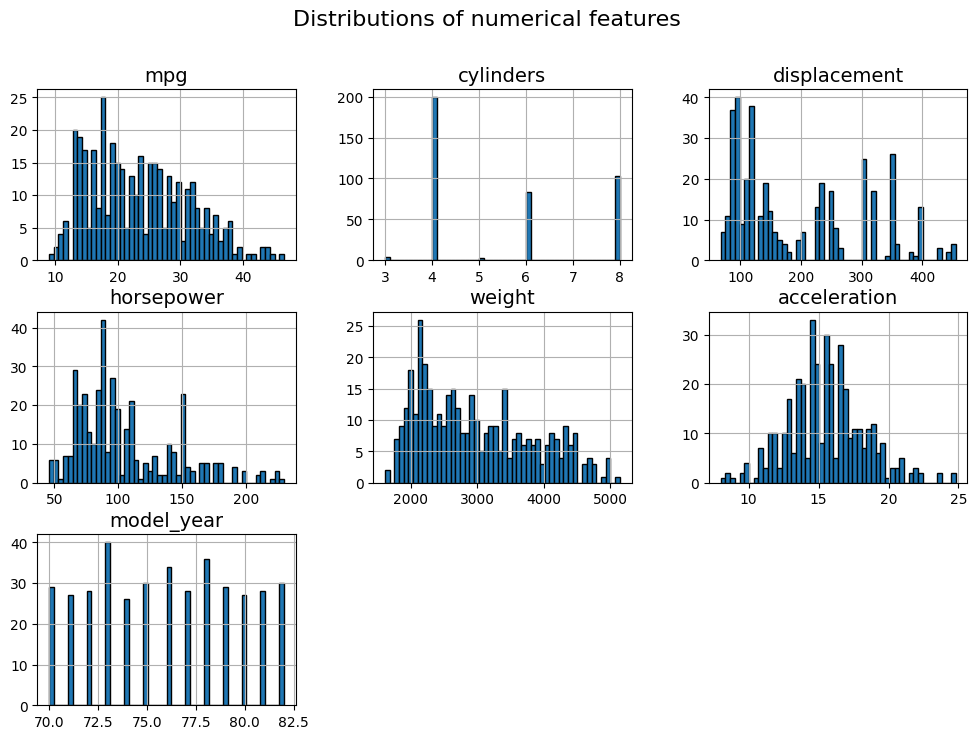

In [21]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

mpg_clean.hist(bins=50, figsize=(12, 8), edgecolor="black")
plt.suptitle("Distributions of numerical features", fontsize=16)
plt.show()